In [1]:
import pandas as pd
import os
import sqlite3
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
# Convert csv file into pandas dataframe
df = pd.read_csv(r'C:\users\Ariel\spotify_top50_2021.csv', encoding="ISO-8859-1", index_col=[0])

# Strip whitespace from headers
df.columns = df.columns.str.strip()

# Remove periods from headers
df.colums = df.columns.str.replace(".","")

# Preview dataframe
df.head()

C:\Users\Ariel\AppData\Local\Temp\ipykernel_5836\242347391.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.colums = df.columns.str.replace(".","")
C:\Users\Ariel\AppData\Local\Temp\ipykernel_5836\242347391.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colums = df.columns.str.replace(".","")


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,
1,Olivia Rodrigo,drivers license,5wANPM4fQCJwkGd4rN57mH,92,0.561,0.431,10,-8.810,1,0.0578,0.76800,0.000014,0.1060,0.137,143.875,242013,4
2,Lil Nas X,MONTERO (Call Me By Your Name),1SC5rEoYDGUK4NfG82494W,90,0.593,0.503,8,-6.725,0,0.2200,0.29300,0.000000,0.4050,0.710,178.781,137704,4
3,The Kid LAROI,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,92,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.478,169.928,141806,4
4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,95,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.688,166.928,178147,4
5,Dua Lipa,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF,89,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4


In [3]:
# Connect to database
conn = sqlite3.connect('database.db')
c = conn.cursor()

In [7]:
# Insert data into database
df.to_sql("TopSong", conn)

50

In [8]:
# Query Table TopSongs

c.execute('''SELECT * FROM TopSong;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,index,id,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,1,Olivia Rodrigo,drivers license,5wANPM4fQCJwkGd4rN57mH,92,0.561,0.431,10,-8.810,1,0.0578,0.76800,0.000014,0.1060,0.1370,143.875,242013,4
1,1,2,Lil Nas X,MONTERO (Call Me By Your Name),1SC5rEoYDGUK4NfG82494W,90,0.593,0.503,8,-6.725,0,0.2200,0.29300,0.000000,0.4050,0.7100,178.781,137704,4
2,2,3,The Kid LAROI,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,92,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.4780,169.928,141806,4
3,3,4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,95,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.6880,166.928,178147,4
4,4,5,Dua Lipa,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF,89,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.9150,102.977,203064,4
5,5,6,Justin Bieber,Peaches (feat. Daniel Caesar & Giveon),4iJyoBOLtHqaGxP12qzhQI,90,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.4640,90.030,198082,4
6,6,7,Doja Cat,Kiss Me More (feat. SZA),3DarAbFujv6eYNliUTyqtz,88,0.764,0.705,8,-3.463,1,0.0284,0.25900,0.000089,0.1200,0.7810,110.970,208667,4
7,7,8,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,93,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,200040,4
8,8,9,Glass Animals,Heat Waves,02MWAaffLxlfxAUY7c5dvx,94,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.5310,80.870,238805,4
9,9,10,MÃ¥neskin,Beggin',3Wrjm47oTz2sjIgck11l5e,93,0.714,0.800,11,-4.808,0,0.0504,0.12700,0.000000,0.3590,0.5890,134.002,211560,4


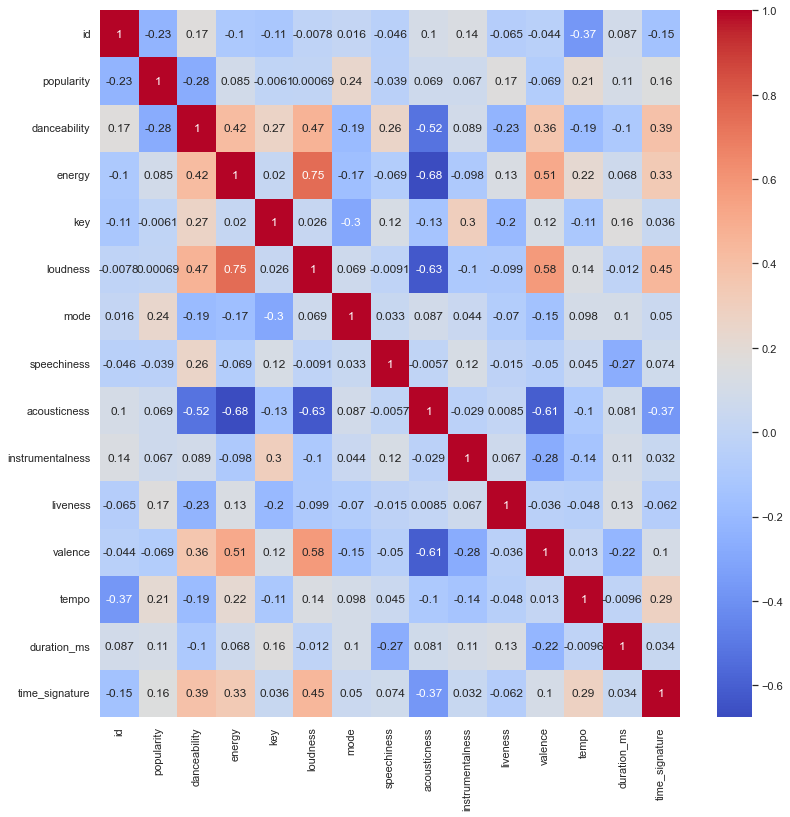

In [6]:
# Show heatmap of all variables

sns.set_theme(rc = {'figure.figsize':(13,13)})
colormap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(df.corr(), cmap=colormap, annot=True)

plt.show()

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>]],
      dtype=object)

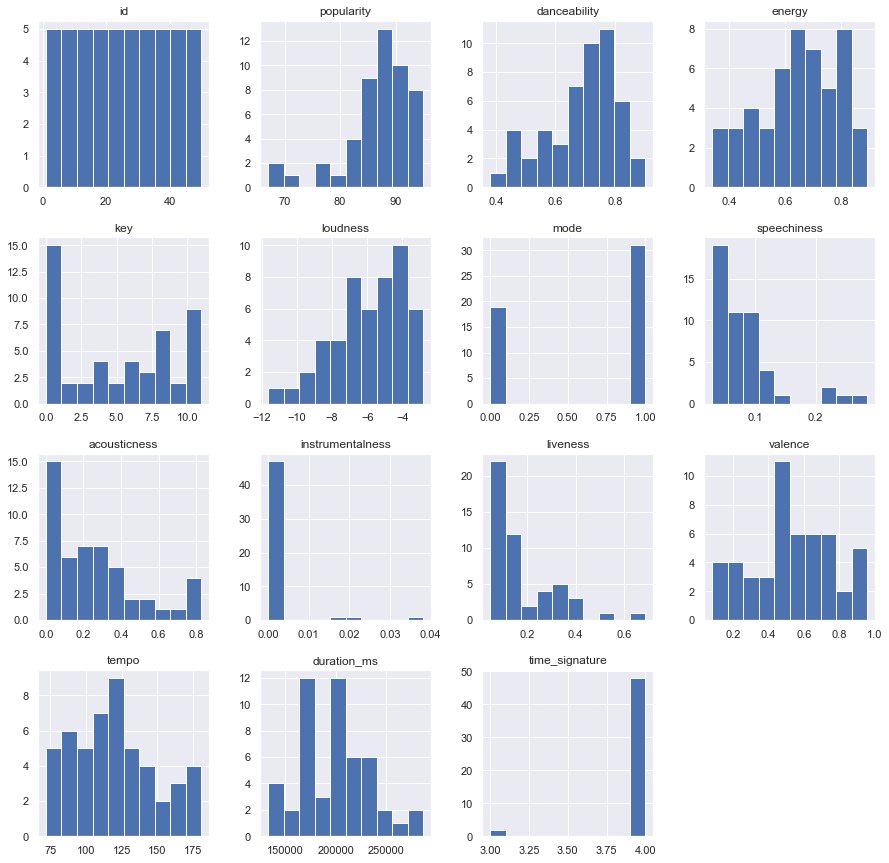

In [11]:
# Show histogram for all variables
df.hist(figsize= [15, 15])

In [21]:
# Query the Artist with Top Songs and Count of Top Songs Each Artist has
c.execute('''SELECT artist_name, COUNT(*)
            FROM TopSong
            GROUP BY artist_name
            ORDER BY COUNT(*) DESC;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df_top_ten = df.head(10)
df_top_ten

,artist_name,COUNT(*)
0,Olivia Rodrigo,4
1,Doja Cat,4
2,Bad Bunny,3
3,The Weeknd,2
4,The Kid LAROI,2
5,MÃ¥neskin,2
6,Lil Nas X,2
7,Dua Lipa,2
8,BTS,2
9,Ariana Grande,2


<AxesSubplot:xlabel='artist_name', ylabel='COUNT(*)'>

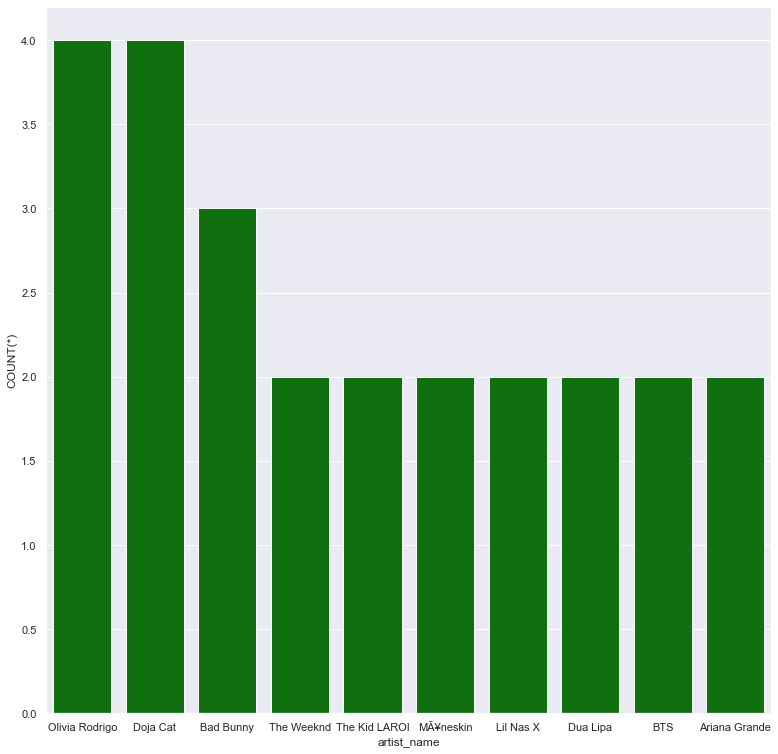

In [22]:
sns.barplot(x="artist_name", y="COUNT(*)", color="Green", data=df_top_ten)

In [24]:
# Query the average BeatsPerMinute in TopSong

c.execute('''SELECT AVG(tempo) FROM TopSong;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,AVG(tempo)
0,121.08386


In [11]:
# look at the top song to see if they are abve or below the average Tempo
c.execute('''SELECT track_name, tempo,
             (CASE 
             WHEN tempo > 121.08 THEN 'Above Average'
             WHEN tempo = 121.08 THEN 'Average'
             WHEN tempo < 121.08 THEN 'Below Average'
             END) AS CompareAverage
             FROM TopSong
             LIMIT 10;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,track_name,tempo,CompareAverage
0,drivers license,143.875,Above Average
1,MONTERO (Call Me By Your Name),178.781,Above Average
2,STAY (with Justin Bieber),169.928,Above Average
3,good 4 u,166.928,Above Average
4,Levitating (feat. DaBaby),102.977,Below Average
5,Peaches (feat. Daniel Caesar & Giveon),90.030,Below Average
6,Kiss Me More (feat. SZA),110.970,Below Average
7,Blinding Lights,171.005,Above Average
8,Heat Waves,80.870,Below Average
9,Beggin',134.002,Above Average


In [12]:
# Look at the top songs to see how far away they are from the average tempo
c.execute('''SELECT track_name, tempo,
             (CASE 
             WHEN tempo BETWEEN 110.08 AND 131.08 THEN 'Within 10'
             WHEN (tempo BETWEEN 100.08 AND 110.07) OR (tempo BETWEEN 130.07 AND 140.06) THEN 'Within 20'
             WHEN (tempo BETWEEN 90.06 AND 100.05) OR (tempo BETWEEN 140.07 AND 150.06) THEN 'Within 30'
             ELSE 'Greater than 30'
             END) AS CompareAverage
             FROM TopSong
             LIMIT 15;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,track_name,tempo,CompareAverage
0,drivers license,143.875,Within 30
1,MONTERO (Call Me By Your Name),178.781,Greater than 30
2,STAY (with Justin Bieber),169.928,Greater than 30
3,good 4 u,166.928,Greater than 30
4,Levitating (feat. DaBaby),102.977,Within 20
5,Peaches (feat. Daniel Caesar & Giveon),90.030,Greater than 30
6,Kiss Me More (feat. SZA),110.970,Within 10
7,Blinding Lights,171.005,Greater than 30
8,Heat Waves,80.870,Greater than 30
9,Beggin',134.002,Within 20


In [15]:
# look at the top song to see if they are above or below the average tempo
c.execute('''SELECT
             SUM(CASE
                 WHEN tempo BETWEEN 110.08 AND 130.08 THEN 1
                 ELSE 0
             END) AS Within10,
             SUM(CASE
                 WHEN (tempo BETWEEN 100.08 AND 110.07) OR (tempo BETWEEN 130.09 AND 140.08) THEN 1
                 ELSE 0
             END) AS Within20,
             SUM(CASE
                 WHEN (tempo BETWEEN 90.08 AND 100.07) OR (tempo BETWEEN 140.09 AND 150.08) THEN 1
                 ELSE 0
             END) AS Within30,
             SUM(CASE
                 WHEN (tempo < 90.08) OR (tempo > 150.08) THEN 1
                 ELSE 0
             END) AS Greater30
             FROM TopSong;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Within10,Within20,Within30,Greater30
0,14,11,8,17


In [16]:
# Query the average energy in TopSong
c.execute('''SELECT AVG(energy)
            FROM TopSong;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,AVG(energy)
0,0.64636


In [17]:
# look at the top song to see if they are above or below the average energy
c.execute('''SELECT track_name, energy,
             (CASE 
             WHEN energy > 0.64 THEN 'Above Average'
             WHEN energy = 0.64 THEN 'Average'
             WHEN energy < 0.64 THEN 'Below Average'
             END) AS CompareAverage
             FROM TopSong
             LIMIT 10;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,track_name,energy,CompareAverage
0,drivers license,0.431,Below Average
1,MONTERO (Call Me By Your Name),0.503,Below Average
2,STAY (with Justin Bieber),0.764,Above Average
3,good 4 u,0.664,Above Average
4,Levitating (feat. DaBaby),0.825,Above Average
5,Peaches (feat. Daniel Caesar & Giveon),0.696,Above Average
6,Kiss Me More (feat. SZA),0.705,Above Average
7,Blinding Lights,0.730,Above Average
8,Heat Waves,0.525,Below Average
9,Beggin',0.800,Above Average


In [18]:
# Look at the top songs to see how far away they are from the average energy
c.execute('''SELECT track_name, energy,
             (CASE 
             WHEN energy BETWEEN 0.54 AND 0.74 THEN 'Within 10'
             WHEN (energy BETWEEN 0.44 AND 0.54) OR (energy BETWEEN 0.74 AND 0.84) THEN 'Within 20'
             WHEN (energy BETWEEN 0.34 AND 0.44) OR (energy BETWEEN 0.84 AND 0.94) THEN 'Within 30'
             ELSE 'Greater than 30'
             END) AS CompareAverage
             FROM TopSong
             LIMIT 20;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,track_name,energy,CompareAverage
0,drivers license,0.431,Within 30
1,MONTERO (Call Me By Your Name),0.503,Within 20
2,STAY (with Justin Bieber),0.764,Within 20
3,good 4 u,0.664,Within 10
4,Levitating (feat. DaBaby),0.825,Within 20
5,Peaches (feat. Daniel Caesar & Giveon),0.696,Within 10
6,Kiss Me More (feat. SZA),0.705,Within 10
7,Blinding Lights,0.730,Within 10
8,Heat Waves,0.525,Within 20
9,Beggin',0.800,Within 20


In [20]:
# look at the top song to see if they are above or below the average energy
c.execute('''SELECT
             SUM(CASE
                 WHEN energy BETWEEN 0.54 AND 0.74 THEN 1
                 ELSE 0
             END) AS Within10,
             SUM(CASE
                 WHEN (energy BETWEEN 0.44 AND 0.54) OR (energy BETWEEN 0.74 AND 0.84) THEN 1
                 ELSE 0
             END) AS Within20,
             SUM(CASE
                 WHEN (energy BETWEEN 0.34 AND 0.44) OR (energy BETWEEN 0.84 AND 0.94) THEN 1
                 ELSE 0
             END) AS Within30,
             SUM(CASE
                 WHEN (energy < 0.34) OR (energy > 0.94) THEN 1
                 ELSE 0
             END) AS Greater30
             FROM TopSong;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Within10,Within20,Within30,Greater30
0,22,19,8,1


In [21]:
# Query the average danceability in TopSong

c.execute('''SELECT AVG(danceability)
            FROM TopSong;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,AVG(danceability)
0,0.68572


In [37]:
# look at the top song to see if they are above or below the average energy
c.execute('''SELECT track_name, danceability, popularity,
             (CASE 
             WHEN energy > 0.68 THEN 'Above Average'
             WHEN energy = 0.68 THEN 'Average'
             WHEN energy < 0.68 THEN 'Below Average'
             END) AS CompareAverage
             FROM TopSong
             ORDER BY popularity DESC
             LIMIT 10;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,track_name,danceability,popularity,CompareAverage
0,good 4 u,0.563,95,Below Average
1,Bad Habits,0.807,95,Above Average
2,Woman,0.824,95,Above Average
3,Heat Waves,0.761,94,Below Average
4,Yonaguni,0.644,94,Below Average
5,Blinding Lights,0.514,93,Above Average
6,Beggin',0.714,93,Above Average
7,Need to Know,0.664,93,Below Average
8,drivers license,0.561,92,Below Average
9,STAY (with Justin Bieber),0.591,92,Above Average


In [38]:
# Look at the top songs to see how far away they are from the average dancebaility corelation with popularity
c.execute('''SELECT track_name, danceability, 
             (CASE 
             WHEN danceability BETWEEN 0.69 AND 0.79 THEN 'Within 10'
             WHEN (danceability BETWEEN 0.49 AND 0.68) OR (danceability BETWEEN 0.79 AND 0.89) THEN 'Within 20'
             WHEN (danceability BETWEEN 0.39 AND 0.49) OR (danceability BETWEEN 0.89 AND 0.99) THEN 'Within 30'
             ELSE 'Greater than 30'
             END) AS CompareAverage
             FROM TopSong
             ORDER BY popularity DESC
             LIMIT 20;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,track_name,danceability,CompareAverage
0,good 4 u,0.563,Within 20
1,Bad Habits,0.807,Within 20
2,Woman,0.824,Within 20
3,Heat Waves,0.761,Within 10
4,Yonaguni,0.644,Within 20
5,Blinding Lights,0.514,Within 20
6,Beggin',0.714,Within 10
7,Need to Know,0.664,Within 20
8,drivers license,0.561,Within 20
9,STAY (with Justin Bieber),0.591,Within 20


In [23]:
# look at the top song to see if they are above or below the average danceability
c.execute('''SELECT
             SUM(CASE
                 WHEN danceability BETWEEN 0.59 AND 0.79 THEN 1
                 ELSE 0
             END) AS Within10,
             SUM(CASE
                 WHEN (danceability BETWEEN 0.49 AND 0.59) OR (danceability BETWEEN 0.79 AND 0.89) THEN 1
                 ELSE 0
             END) AS Within20,
             SUM(CASE
                 WHEN (danceability BETWEEN 0.39 AND 0.49) OR (danceability BETWEEN 0.89 AND 0.99) THEN 1
                 ELSE 0
             END) AS Within30,
             SUM(CASE
                 WHEN (danceability < 0.39) OR (danceability > 0.99) THEN 1
                 ELSE 0
             END) AS Greater30
             FROM TopSong;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Within10,Within20,Within30,Greater30
0,29,15,5,1


In [24]:
# Query the average loudness in TopSong
c.execute('''SELECT AVG(loudness)
            FROM TopSong;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,AVG(loudness)
0,-5.90392


In [25]:
# look at the 10 top song to see if they are above or below the average loudness
c.execute('''SELECT track_name, loudness,
             (CASE 
             WHEN loudness > -5.90 THEN 'Above Average'
             WHEN loudness = -5.90 THEN 'Average'
             WHEN loudness < -5.90 THEN 'Below Average'
             END) AS CompareAverage
             FROM TopSong
             LIMIT 10;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,track_name,loudness,CompareAverage
0,drivers license,-8.810,Below Average
1,MONTERO (Call Me By Your Name),-6.725,Below Average
2,STAY (with Justin Bieber),-5.484,Above Average
3,good 4 u,-5.044,Above Average
4,Levitating (feat. DaBaby),-3.787,Above Average
5,Peaches (feat. Daniel Caesar & Giveon),-6.181,Below Average
6,Kiss Me More (feat. SZA),-3.463,Above Average
7,Blinding Lights,-5.934,Below Average
8,Heat Waves,-6.900,Below Average
9,Beggin',-4.808,Above Average


In [26]:
# Look at the top songs to see how far away they are from the average loudness
c.execute('''SELECT track_name, loudness,
             (CASE 
             WHEN loudness BETWEEN -6.90 AND -4.90 THEN 'Within 1'
             WHEN (loudness BETWEEN -7.90 AND -6.91) OR (loudness BETWEEN -4.89 AND -3.90) THEN 'Within 2'
             WHEN (loudness BETWEEN -8.90 AND -7.91) OR (loudness BETWEEN -3.89 AND -2.90) THEN 'Within 3'
             ELSE 'Greater than 3'
             END) AS CompareAverage
             FROM TopSong
             LIMIT 20;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,track_name,loudness,CompareAverage
0,drivers license,-8.810,Within 3
1,MONTERO (Call Me By Your Name),-6.725,Within 1
2,STAY (with Justin Bieber),-5.484,Within 1
3,good 4 u,-5.044,Within 1
4,Levitating (feat. DaBaby),-3.787,Within 3
5,Peaches (feat. Daniel Caesar & Giveon),-6.181,Within 1
6,Kiss Me More (feat. SZA),-3.463,Within 3
7,Blinding Lights,-5.934,Within 1
8,Heat Waves,-6.900,Within 1
9,Beggin',-4.808,Within 2


In [30]:
# look at the top song to see if they are above or below the average loudness
c.execute('''SELECT
             SUM(CASE WHEN loudness BETWEEN -6.90 AND -4.90 THEN 1
                 ELSE 0
             END) AS Within1,
             SUM(CASE WHEN (loudness BETWEEN -7.90 AND -6.91) OR (loudness BETWEEN -4.89 AND -3.90) THEN 1
                 ELSE 0
             END) AS Within2,
             SUM(CASE
                WHEN (loudness BETWEEN -8.90 AND -7.91) OR (loudness BETWEEN -3.89 AND -2.90) THEN 1
                 ELSE 0
             END) AS Within3,
             SUM(CASE
                WHEN (loudness < -8.90) OR (loudness > -2.90) THEN 1
                 ELSE 0
             END) AS Greater3
             FROM TopSong;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Within1,Within2,Within3,Greater3
0,15,17,11,6


In [31]:
# Query the average liveness in TopSong
c.execute('''SELECT AVG(liveness)
            FROM TopSong;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,AVG(liveness)
0,0.182292


In [32]:
# look at the 10 top song to see if they are above or below the average liveness
c.execute('''SELECT track_name, liveness,
             (CASE 
             WHEN liveness > 0.1823 THEN 'Above Average'
             WHEN liveness = 0.1823 THEN 'Average'
             WHEN liveness < 0.1823 THEN 'Below Average'
             END) AS CompareAverage
             FROM TopSong
             LIMIT 10;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,track_name,liveness,CompareAverage
0,drivers license,0.1060,Below Average
1,MONTERO (Call Me By Your Name),0.4050,Above Average
2,STAY (with Justin Bieber),0.1030,Below Average
3,good 4 u,0.0849,Below Average
4,Levitating (feat. DaBaby),0.0674,Below Average
5,Peaches (feat. Daniel Caesar & Giveon),0.4200,Above Average
6,Kiss Me More (feat. SZA),0.1200,Below Average
7,Blinding Lights,0.0897,Below Average
8,Heat Waves,0.0921,Below Average
9,Beggin',0.3590,Above Average


In [33]:
# Look at the top songs to see how far away they are from the average liveness

c.execute('''SELECT track_name, liveness,
             (CASE 
                WHEN liveness BETWEEN 0.1623 AND 0.2023 THEN 'Within 2'
                WHEN (liveness BETWEEN 0.1423 AND 0.1622) OR (liveness BETWEEN 0.2024 AND 0.2223) THEN 'Within 4'
                WHEN (liveness BETWEEN 0.1023 AND 0.1422) OR (liveness BETWEEN 0.2223 AND 0.2623) THEN 'Within 8'
                ELSE 'Greater than 8'
             END) AS CompareAverage
             FROM TopSong
             LIMIT 20;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,track_name,liveness,CompareAverage
0,drivers license,0.1060,Within 8
1,MONTERO (Call Me By Your Name),0.4050,Greater than 8
2,STAY (with Justin Bieber),0.1030,Within 8
3,good 4 u,0.0849,Greater than 8
4,Levitating (feat. DaBaby),0.0674,Greater than 8
5,Peaches (feat. Daniel Caesar & Giveon),0.4200,Greater than 8
6,Kiss Me More (feat. SZA),0.1200,Within 8
7,Blinding Lights,0.0897,Greater than 8
8,Heat Waves,0.0921,Greater than 8
9,Beggin',0.3590,Greater than 8


In [5]:
# look at the top song to see if they are above or below the average liveness
c.execute('''SELECT
             SUM(CASE WHEN liveness BETWEEN 0.1623 AND 0.2023 THEN 1
                 ELSE 0
             END) AS Within2,
             SUM(CASE WHEN (liveness BETWEEN 0.1423 AND 0.1622) OR (liveness BETWEEN 0.2024 AND 0.2223) THEN 1
                 ELSE 0
             END) AS Within4,
             SUM(CASE
                WHEN (liveness BETWEEN 0.1023 AND 0.1422) OR (liveness BETWEEN 0.2223 AND 0.2623) THEN 1
                 ELSE 0
             END) AS Within8,
             SUM(CASE
                WHEN (liveness < 0.1023) OR (liveness > 0.2623) THEN 1
                 ELSE 0
             END) AS Greater8
             FROM TopSong;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Within2,Within4,Within8,Greater8
0,1,3,16,30


In [7]:
# Query the average valence in TopSong
c.execute('''SELECT AVG(valence)
            FROM TopSong;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,AVG(valence)
0,0.528884


In [8]:
# look at the 10 top song to see if they are above or below the average valence
c.execute('''SELECT track_name, valence,
             (CASE 
             WHEN valence > 0.529 THEN 'Above Average'
             WHEN valence = 0.529 THEN 'Average'
             WHEN valence < 0.529 THEN 'Below Average'
             END) AS CompareAverage
             FROM TopSong
             LIMIT 10;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,track_name,valence,CompareAverage
0,drivers license,0.137,Below Average
1,MONTERO (Call Me By Your Name),0.710,Above Average
2,STAY (with Justin Bieber),0.478,Below Average
3,good 4 u,0.688,Above Average
4,Levitating (feat. DaBaby),0.915,Above Average
5,Peaches (feat. Daniel Caesar & Giveon),0.464,Below Average
6,Kiss Me More (feat. SZA),0.781,Above Average
7,Blinding Lights,0.334,Below Average
8,Heat Waves,0.531,Above Average
9,Beggin',0.589,Above Average


In [22]:
# Look at the top songs to see how far away they are from the average valence

c.execute('''SELECT track_name, valence, popularity,
             (CASE 
                WHEN valence BETWEEN 0.489 AND 0.569 THEN 'Within 4'
                WHEN (valence BETWEEN 0.449 AND 0.488) OR (valence BETWEEN 0.568 AND 0.609) THEN 'Within 8'
                WHEN (valence BETWEEN 0.409 AND 0.450) OR (valence BETWEEN 0.569 AND 0.649) THEN 'Within 12'
                ELSE 'Greater than 12'
             END) AS CompareAverage
             FROM TopSong
             ORDER BY popularity DESC
             LIMIT 20;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,track_name,valence,popularity,CompareAverage
0,good 4 u,0.6880,95,Greater than 12
1,Bad Habits,0.5370,95,Within 4
2,Woman,0.8810,95,Greater than 12
3,Heat Waves,0.5310,94,Within 4
4,Yonaguni,0.4400,94,Within 12
5,Blinding Lights,0.3340,93,Greater than 12
6,Beggin',0.5890,93,Within 8
7,Need to Know,0.1940,93,Greater than 12
8,drivers license,0.1370,92,Greater than 12
9,STAY (with Justin Bieber),0.4780,92,Within 8


In [10]:
# look at the top song to see if they are above or below the average valence
c.execute('''SELECT
             SUM(CASE WHEN valence BETWEEN 0.489 AND 0.569 THEN 1
                 ELSE 0
             END) AS Within4,
             SUM(CASE WHEN (valence BETWEEN 0.449 AND 0.488) OR (valence BETWEEN 0.568 AND 0.609) THEN 1
                 ELSE 0
             END) AS Within8,
             SUM(CASE
                WHEN (valence BETWEEN 0.409 AND 0.450) OR (valence BETWEEN 0.569 AND 0.649) THEN 1
                 ELSE 0
             END) AS Within12,
             SUM(CASE
                WHEN (liveness < 0.409) OR (liveness > 0.649) THEN 1
                 ELSE 0
             END) AS Greater12
             FROM TopSong;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Within4,Within8,Within12,Greater12
0,6,7,7,48


In [11]:
# Query the select length in TopSong
c.execute('''UPDATE TopSong
            SET duration = (SELECT new.duration FROM new WHERE new.track=TopSong.track_name) WHERE EXISTS (SELECT * FROM new WHERE new.track=TopSong.track_name);''')

In [64]:
# Query the select length in TopSong
c.execute('''SELECT AVG(duration)
            FROM TopSong;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,AVG(duration)
0,197.1


In [12]:
# look at the 10 top song to see if they are above or below the average length
c.execute('''SELECT track_name, duration,
             (CASE 
             WHEN duration > 197.1 THEN 'Above Average'
             WHEN duration = 197.1 THEN 'Average'
             WHEN duration < 197.1 THEN 'Below Average'
             END) AS CompareAverage
             FROM TopSong
             LIMIT 10;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,track_name,duration,CompareAverage
0,drivers license,242,Above Average
1,MONTERO (Call Me By Your Name),137,Below Average
2,STAY (with Justin Bieber),141,Below Average
3,good 4 u,178,Below Average
4,Levitating (feat. DaBaby),203,Above Average
5,Peaches (feat. Daniel Caesar & Giveon),198,Above Average
6,Kiss Me More (feat. SZA),208,Above Average
7,Blinding Lights,200,Above Average
8,Heat Waves,238,Above Average
9,Beggin',211,Above Average


In [20]:
# Look at the top songs to see how far away they are from the average length

c.execute('''SELECT track_name, duration, popularity,
             (CASE 
                WHEN duration BETWEEN 207.1 AND 187.1 THEN 'Within 10'
                WHEN (duration BETWEEN 177.1 AND 207) OR (duration BETWEEN 187.2 AND 217.1) THEN 'Within 20'
                WHEN (duration BETWEEN 167.1 AND 177) OR (duration BETWEEN 217.2 AND 227.1) THEN 'Within 30'
                ELSE 'Greater than 30'
             END) AS CompareAverage
             FROM TopSong
             ORDER BY popularity DESC
             LIMIT 20;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,track_name,duration,popularity,CompareAverage
0,good 4 u,178,95,Within 20
1,Bad Habits,230,95,Greater than 30
2,Woman,172,95,Within 30
3,Heat Waves,238,94,Greater than 30
4,Yonaguni,206,94,Within 20
5,Blinding Lights,200,93,Within 20
6,Beggin',211,93,Within 20
7,Need to Know,210,93,Within 20
8,drivers license,242,92,Greater than 30
9,STAY (with Justin Bieber),141,92,Greater than 30


In [23]:
# look at the top song to see if they are above or below the average valence
c.execute('''SELECT
             SUM(CASE WHEN valence BETWEEN 207.1 AND 187.1 THEN 1
                 ELSE 0
             END) AS Within10,
             SUM(CASE WHEN (duration BETWEEN 177.1 AND 207) OR (duration BETWEEN 187.2 AND 217.1) THEN 1
                 ELSE 0
             END) AS Within20,
             SUM(CASE
                WHEN (duration BETWEEN 167.1 AND 177) OR (duration BETWEEN 217.2 AND 227.1) THEN 1
                 ELSE 0
             END) AS Within30,
             SUM(CASE
                WHEN (duration < 167.1) OR (duration > 227.1) THEN 1
                 ELSE 0
             END) AS Greater30
             FROM TopSong;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Within10,Within20,Within30,Greater30
0,0,22,8,20


In [25]:
# Query the select speehcniness in TopSong
c.execute('''SELECT AVG(speechiness)
            FROM TopSong;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,AVG(speechiness)
0,0.081374


In [34]:
# look at the 10 top song to see if they are above or below the average length and corelation with tempo
c.execute('''SELECT track_name, speechiness, tempo,
             (CASE 
             WHEN speechiness > 0.081 THEN 'Above Average'
             WHEN speechiness = 0.081 THEN 'Average'
             WHEN speechiness < 0.081 THEN 'Below Average'
             END) AS CompareAverage
             FROM TopSong
             ORDER BY tempo DESC
             LIMIT 10;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,track_name,speechiness,tempo,CompareAverage
0,deja vu,0.1120,180.917,Above Average
1,Yonaguni,0.1180,179.951,Above Average
2,MONTERO (Call Me By Your Name),0.2200,178.781,Above Average
3,Blinding Lights,0.0598,171.005,Below Average
4,STAY (with Justin Bieber),0.0483,169.928,Below Average
5,Bandido,0.0887,168.021,Above Average
6,good 4 u,0.1540,166.928,Above Average
7,INDUSTRY BABY (feat. Jack Harlow),0.0672,150.087,Below Average
8,Astronaut In The Ocean,0.0913,149.996,Above Average
9,Leave The Door Open,0.0324,148.088,Below Average


In [36]:
# look at the 10 top song to see if they are above or below the average length corelation with popularity
c.execute('''SELECT track_name, speechiness, popularity,
             (CASE 
             WHEN speechiness > 0.081 THEN 'Above Average'
             WHEN speechiness = 0.081 THEN 'Average'
             WHEN speechiness < 0.081 THEN 'Below Average'
             END) AS CompareAverage
             FROM TopSong
             ORDER BY popularity DESC
             LIMIT 10;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,track_name,speechiness,popularity,CompareAverage
0,good 4 u,0.1540,95,Above Average
1,Bad Habits,0.0347,95,Below Average
2,Woman,0.0854,95,Above Average
3,Heat Waves,0.0944,94,Above Average
4,Yonaguni,0.1180,94,Above Average
5,Blinding Lights,0.0598,93,Below Average
6,Beggin',0.0504,93,Below Average
7,Need to Know,0.0707,93,Below Average
8,drivers license,0.0578,92,Below Average
9,STAY (with Justin Bieber),0.0483,92,Below Average
